In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from os.path import join as oj
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split
import mat4py
from sklearn import metrics
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from torch import nn
import torch.nn.functional as F
import torch
from copy import deepcopy
from sklearn import metrics
plt.style.use('dark_background')
import mat4py
import pandas as pd
import data_tracks
import models
from imblearn.over_sampling import RandomOverSampler
import pickle as pkl
from style import *
import viz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
df = data_tracks.get_data(use_processed=True, use_processed_dicts=True)
n = df.shape[0]
df.keys()

# visualize a single example

In [ ]:
# pick a single interesting example
# ex = df[df.lifetime > 250].iloc[0]
ex = df[(df.lifetime > 30) * (df.lifetime < 40) * (df.y_consec_sig == 1)].iloc[0]
plt.figure(dpi=200)
plt.plot(ex['X'], color='red', label='clathrin')
plt.plot(ex['Y'], color='green', label='auxilin')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# basic eda

In [ ]:
viz.plot_curves(df)

In [ ]:
plt.plot(df['x_pos'], df['y_pos'], 'o', alpha=0.1)

# look at learned dictionaries

['nmf_12.pkl', 'sc_12_alpha=1.pkl']


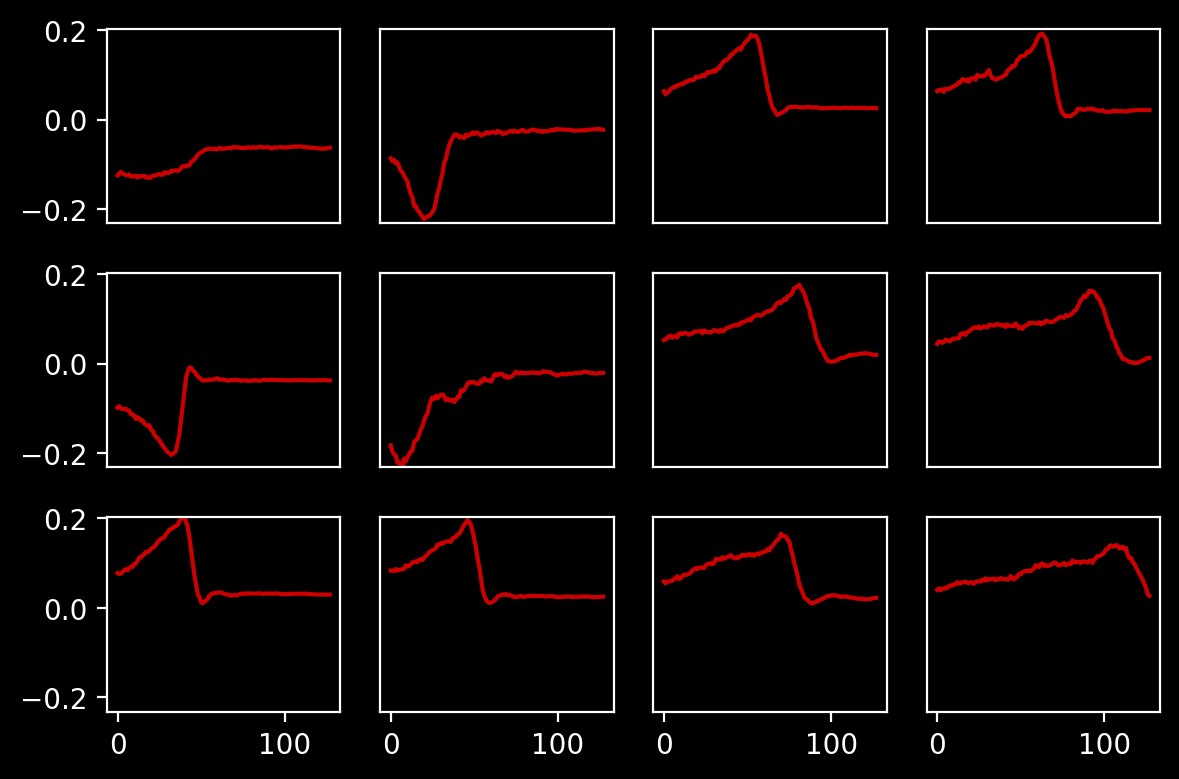

In [30]:
print(os.listdir('processed/dictionaries'))
# d = pkl.load(open(f'processed/dictionaries/' + 'sc_12_alpha=1.pkl', 'rb'))
d = pkl.load(open(f'dictionaries/' + 'nmf_12.pkl', 'rb'))
R, C = 3, 4
i = 0
plt.figure(dpi=200)
vmin = d.components_.min()
vmax = d.components_.max()
# print('err', d.reconstruction_err_ / np.linalg.norm(X_mat, ord='fro'))
for r in range(R):
    for c in range(C):
        plt.subplot(R, C, i + 1)
        plt.plot(d.components_[i], color=cr)
        i += 1
        plt.ylim((vmin, vmax))
        if r < R-1:
            plt.xticks([])
        if c > 0:
            plt.yticks([])
plt.tight_layout()
plt.show()

# viz tracks where auxilin peaks first

In [ ]:
X_peak_idx = np.array([np.argmax(x) for x in df.X])
Y_peak_idx = np.array([np.argmax(y) for y in df.Y])

df_err = df[Y_peak_idx < X_peak_idx]
print('num tot', df.shape[0], 'num aux peaks first', df_err.shape[0])
viz.plot_curves(df_err)

# analyze tracking

In [1]:
fname = f'/scratch/users/vision/data/abc_data/auxilin_data_tracked/A7D2/Cell1_1s/TagRFP/Tracking/ProcessedTracks.mat'
mat = mat4py.loadmat(fname)
tracks = mat['tracks']

In [3]:
i = 2
x = tracks['x'][i][0]
xx = tracks['x'][i][1]

print('clath', len(x), 'aux', len(xx))

clath 300 aux 300


In [ ]:
for i in range(1000):
    print(tracks['t'][i][:5])